In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from helpers_plot import initPlot
initPlot()
from matplotlib.offsetbox import AnchoredText

In [37]:
dir_data="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/"

Map2_vanilla= np.loadtxt(dir_data+"map_squared_our_thetas/map_squared.dat")
Map2_downsampled= np.loadtxt(dir_data+"map_squared_our_thetas/map_squared_ngal_1728000.dat")
Map2_downsampled2= np.loadtxt(dir_data+"map_squared_our_thetas/map_squared_ngal_576000.dat")
Map2_downsampled3= np.loadtxt(dir_data+"map_squared_our_thetas/map_squared_ngal_288000.dat")


Map2_shapenoise= np.loadtxt(dir_data+"map_squared_our_thetas/map_squared_sigma_0.37.dat")
Map2_shapenoise2= np.loadtxt(dir_data+"map_squared_our_thetas/map_squared_sigma_1.dat")

Map2_downsampled_shapenoise= np.loadtxt(dir_data+"map_squared_our_thetas/map_squared_ngal_1728000_sigma_0.37.dat")
Map2_downsampled_shapenoise2= np.loadtxt(dir_data+"map_squared_our_thetas/map_squared_ngal_1728000_sigma_0.12.dat")



In [42]:
Cov_vanilla=np.cov(Map2_vanilla)
Cov_downsampled=np.cov(Map2_downsampled)
Cov_downsampled2=np.cov(Map2_downsampled2)
Cov_downsampled3=np.cov(Map2_downsampled3)

Cov_shapenoise=np.cov(Map2_shapenoise)
Cov_shapenoise2=np.cov(Map2_shapenoise2)

Cov_downsampled_shapenoise=np.cov(Map2_downsampled_shapenoise)
Cov_downsampled_shapenoise2=np.cov(Map2_downsampled_shapenoise2)


Cov_Gauss_infinite=np.loadtxt(dir_data+"covMap2_infinite_Gauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
Cov_Gauss_square=np.loadtxt(dir_data+"covMap2_square_Gauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
Cov_NonGauss_infinite=np.loadtxt(dir_data+"covMap2_infinite_NonGauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
Cov_NonGauss_square=np.loadtxt(dir_data+"covMap2_square_NonGauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")

Cov_Gauss_infinite_shapenoise=np.loadtxt(dir_data+"covMap2_infinite_Gauss_sigma_0.37_n_1048456.68_thetaMax_1.87_gpu.dat")
#Cov_Gauss_square_shapenoise=np.loadtxt(dir_data+"covMap2_square_Gauss_sigma_0.37_n_107987.71_thetaMax_1.87_gpu.dat")
Cov_NonGauss_infinite_shapenoise=np.loadtxt(dir_data+"covMap2_infinite_NonGauss_sigma_0.37_n_1048456.68_thetaMax_1.87_gpu.dat")
#Cov_NonGauss_square_shapenoise=np.loadtxt(dir_data+"covMap2_square_NonGauss_sigma_0.37_n_107987.71_thetaMax_1.87_gpu.dat")

Nlos=64

Cov_vanilla_parts=np.array([np.cov(Map2_vanilla[:,:Nlos//4]), np.cov(Map2_vanilla[:,Nlos//4:Nlos//2]), np.cov(Map2_vanilla[:,Nlos//2:3*Nlos//4]), np.cov(Map2_vanilla[:,3*Nlos//4:])])
Cov_vanilla_std=np.std(Cov_vanilla_parts, axis=0)

In [18]:
thetas_ind = np.array([2,4, 8, 16])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

## Plot comparing all MS cases

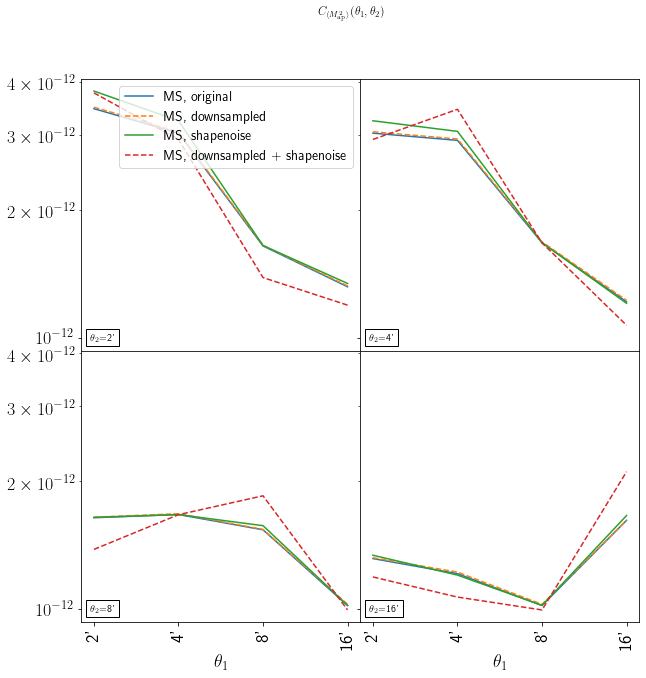

In [23]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(10,10))
fig.subplots_adjust(hspace=0, wspace=0)

fig.suptitle(r"$C_{\langle M_\mathrm{ap}^2\rangle}(\theta_1, \theta_2)$")

for i,ax in enumerate(axs.ravel()):
    ax.set_yscale('log')
    if (i==2 or i==3):
        ax.set_xticks(thetas_ticks)
        ax.set_xlabel(r'$\theta_1$')
        ax.set_xticklabels(thetas_labels, rotation=90)

    at=AnchoredText(r'$\theta_2$='+thetas_labels[i], loc='lower left')
    ax.add_artist(at)

    ax.plot(Cov_vanilla[i], label="MS, original")
    ax.plot(Cov_downsampled[i], label="MS, downsampled", ls='--')
    ax.plot(Cov_shapenoise[i], label="MS, shapenoise", ls='-')
    ax.plot(Cov_downsampled_shapenoise[i], label="MS, downsampled + shapenoise", ls='--')



axs[0][0].legend(loc="upper right")

## Plot comparing no shapenoise cases

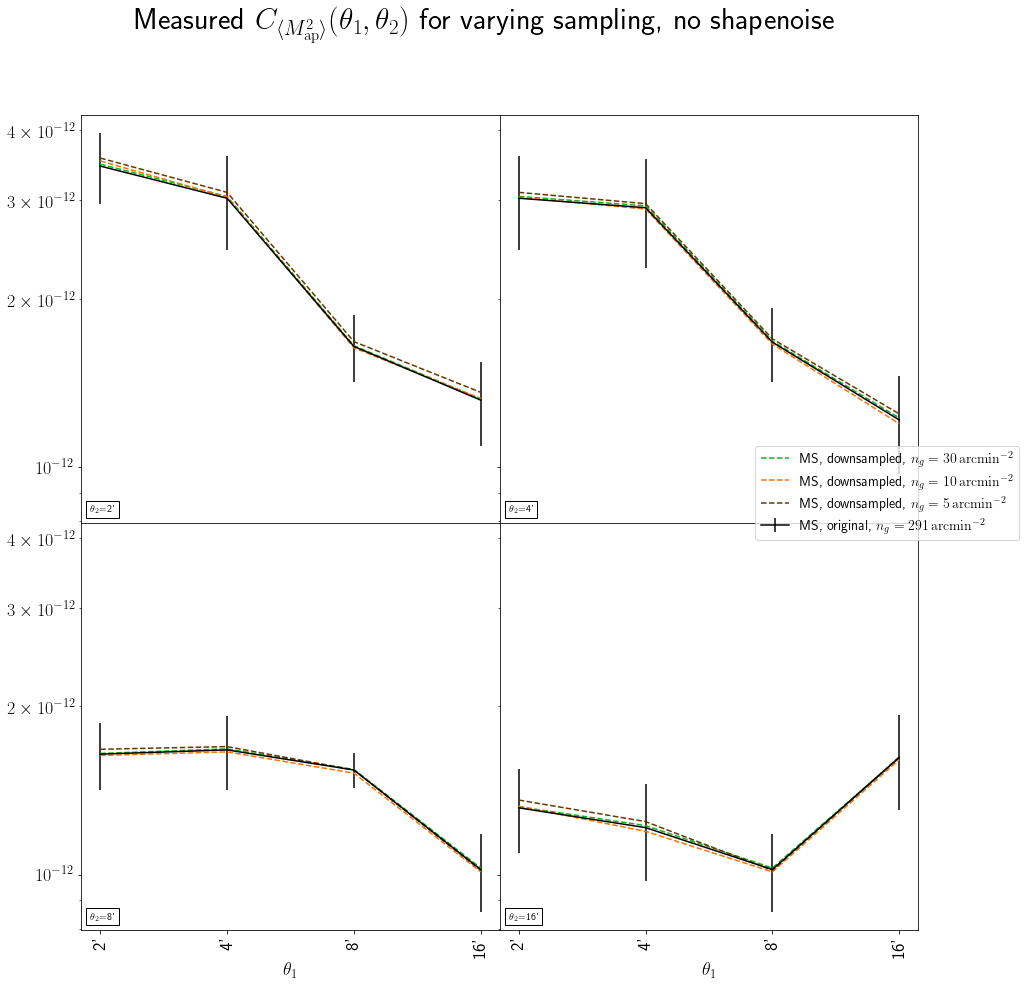

In [62]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(15,15))
fig.subplots_adjust(hspace=0, wspace=0)

fig.suptitle(r"Measured $C_{\langle M_\mathrm{ap}^2\rangle}(\theta_1, \theta_2)$ for varying sampling, no shapenoise", size=30)

for i,ax in enumerate(axs.ravel()):
    ax.set_yscale('log')
    if (i==2 or i==3):
        ax.set_xticks(thetas_ticks)
        ax.set_xlabel(r'$\theta_1$')
        ax.set_xticklabels(thetas_labels, rotation=90)

    at=AnchoredText(r'$\theta_2$='+thetas_labels[i], loc='lower left')
    ax.add_artist(at)

    ax.errorbar(np.arange(4), Cov_vanilla[i], yerr=Cov_vanilla_std[i]/2, label=r"MS, original, $n_g=291 \,\mathrm{arcmin^{-2}}$", color='k')
    ax.plot(Cov_downsampled[i], label=r"MS, downsampled, $n_g=30 \,\mathrm{arcmin^{-2}}$", ls='--', color='xkcd:green')
    ax.plot(Cov_downsampled2[i], label=r"MS, downsampled, $n_g=10 \,\mathrm{arcmin^{-2}}$", ls='--', color='xkcd:orange')
    ax.plot(Cov_downsampled3[i], label=r"MS, downsampled, $n_g=5 \,\mathrm{arcmin^{-2}}$", ls='--', color='xkcd:brown')


    #ax.plot(Cov_Gauss_square[i], label="Gaussian, Square", color='xkcd:red', ls='-.')
    #ax.plot(Cov_NonGauss_square[i], label="NonGaussian, Square", color='xkcd:red', ls=':')
    #ax.plot(Cov_Gauss_square[i]+Cov_NonGauss_square[i], label="Model, Square", color='xkcd:red', ls='-')
    #ax.plot(Cov_Gauss_infinite[i], label="Gaussian, Infinite", color='xkcd:blue', ls='-.')
    #ax.plot(Cov_NonGauss_infinite[i], label="NonGaussian, Infinite", color='xkcd:blue', ls=':')
    #ax.plot(Cov_Gauss_infinite[i]+Cov_NonGauss_infinite[i], label="Sum, Infinite", color='xkcd:blue', ls='-')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')


#axs[0][0].legend(loc="upper right")
#fig.legend()

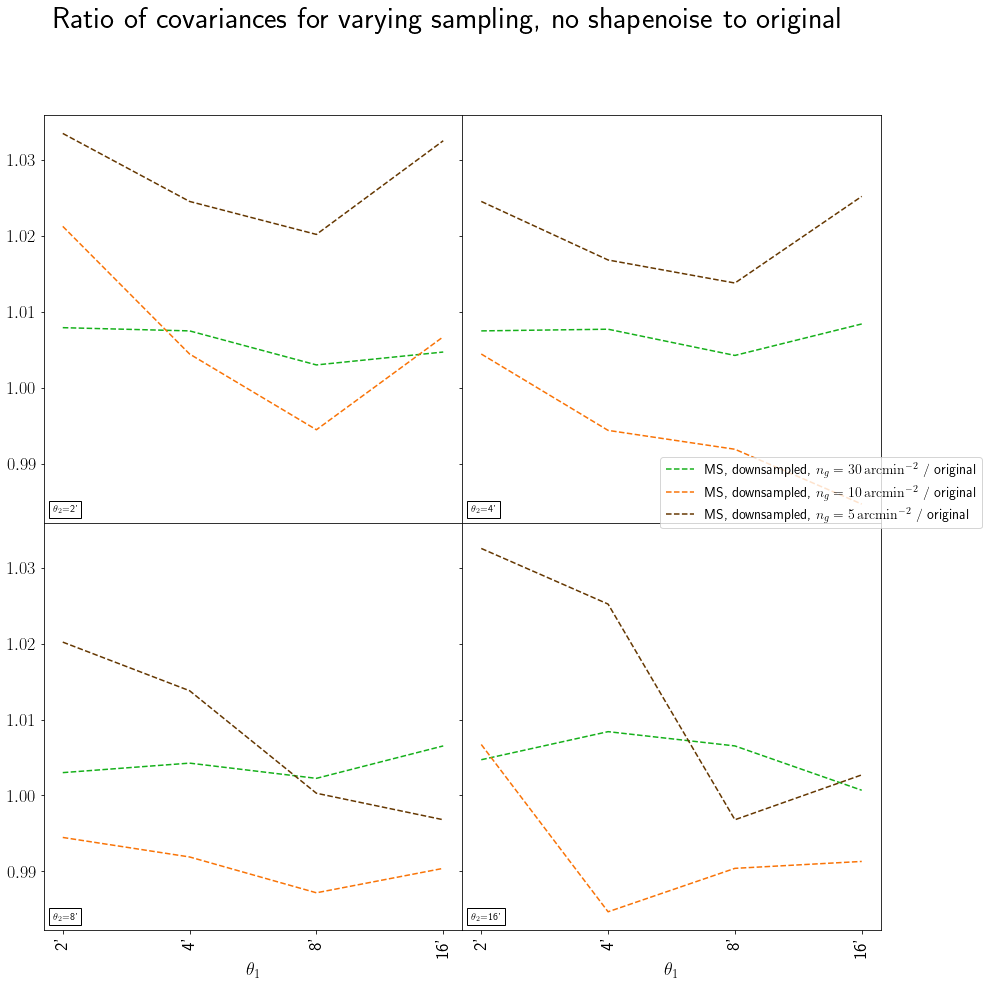

In [56]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(15,15))
fig.subplots_adjust(hspace=0, wspace=0)

fig.suptitle(r"Ratio of covariances for varying sampling, no shapenoise to original", size=30)

for i,ax in enumerate(axs.ravel()):
    #ax.set_yscale('log')
    if (i==2 or i==3):
        ax.set_xticks(thetas_ticks)
        ax.set_xlabel(r'$\theta_1$')
        ax.set_xticklabels(thetas_labels, rotation=90)

    at=AnchoredText(r'$\theta_2$='+thetas_labels[i], loc='lower left')
    ax.add_artist(at)

    #ax.errorbar(np.arange(4), Cov_vanilla[i], yerr=Cov_vanilla_std[i]/2, label=r"MS, original, $n_g=291 \,\mathrm{arcmin^{-2}}$", color='k')
    ax.plot(Cov_downsampled[i]/Cov_vanilla[i], label=r"MS, downsampled, $n_g=30 \,\mathrm{arcmin^{-2}}$ / original", ls='--', color='xkcd:green')
    ax.plot(Cov_downsampled2[i]/Cov_vanilla[i], label=r"MS, downsampled, $n_g=10 \,\mathrm{arcmin^{-2}}$ / original", ls='--', color='xkcd:orange')
    ax.plot(Cov_downsampled3[i]/Cov_vanilla[i], label=r"MS, downsampled, $n_g=5 \,\mathrm{arcmin^{-2}}$ / original", ls='--', color='xkcd:brown')


    #ax.plot(Cov_Gauss_square[i], label="Gaussian, Square", color='xkcd:red', ls='-.')
    #ax.plot(Cov_NonGauss_square[i], label="NonGaussian, Square", color='xkcd:red', ls=':')
    #ax.plot(Cov_Gauss_square[i]+Cov_NonGauss_square[i], label="Model, Square", color='xkcd:red', ls='-')
    #ax.plot(Cov_Gauss_infinite[i], label="Gaussian, Infinite", color='xkcd:blue', ls='-.')
    #ax.plot(Cov_NonGauss_infinite[i], label="NonGaussian, Infinite", color='xkcd:blue', ls=':')
    #ax.plot(Cov_Gauss_infinite[i]+Cov_NonGauss_infinite[i], label="Sum, Infinite", color='xkcd:blue', ls='-')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')


## Plot comparing shapenoise cases

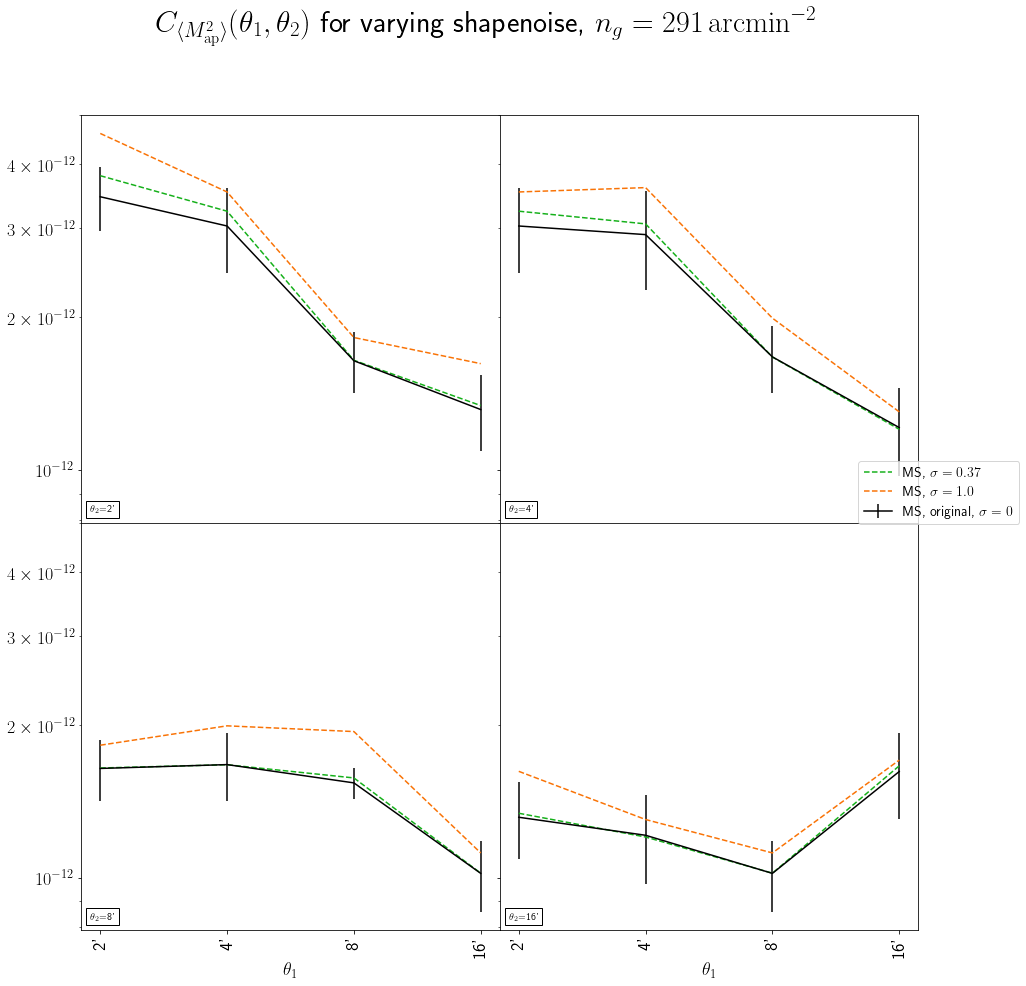

In [61]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(15,15))
fig.subplots_adjust(hspace=0, wspace=0)

fig.suptitle(r"$C_{\langle M_\mathrm{ap}^2\rangle}(\theta_1, \theta_2)$ for varying shapenoise, $n_g=291\, \mathrm{arcmin}^{-2}$", size=30)

for i,ax in enumerate(axs.ravel()):
    ax.set_yscale('log')
    if (i==2 or i==3):
        ax.set_xticks(thetas_ticks)
        ax.set_xlabel(r'$\theta_1$')
        ax.set_xticklabels(thetas_labels, rotation=90)

    at=AnchoredText(r'$\theta_2$='+thetas_labels[i], loc='lower left')
    ax.add_artist(at)
#    ax.plot(Cov_vanilla[i], label=r"MS, $\sigma=0$", color='k')
    ax.errorbar(np.arange(4), Cov_vanilla[i], yerr=Cov_vanilla_std[i]/2, label=r"MS, original, $\sigma=0$", color='k')


    ax.plot(Cov_shapenoise[i], label=r"MS, $\sigma=0.37$", color='xkcd:green', ls='--')
    ax.plot(Cov_shapenoise2[i], label=r"MS, $\sigma=1.0$", color='xkcd:orange', ls='--')
    
   # ax.plot(Cov_downsampled_shapenoise[i], label="MS, downsampled", ls='--', color='xkcd:green')
    # ax.plot(Cov_Gauss_square_shapenoise[i], label="Gaussian, Square", color='xkcd:red', ls='-.')
    # ax.plot(Cov_NonGauss_square_shapenoise[i], label="NonGaussian, Square", color='xkcd:red', ls=':')
    # ax.plot(Cov_Gauss_square_shapenoise[i]+Cov_NonGauss_square_shapenoise[i], label="Sum, Square", color='xkcd:red', ls='-')
    # ax.plot(Cov_Gauss_infinite_shapenoise[i], label="Gaussian, Infinite", color='xkcd:blue', ls='-.')
    # ax.plot(Cov_NonGauss_infinite_shapenoise[i], label="NonGaussian, Infinite", color='xkcd:blue', ls=':')
    # ax.plot(Cov_Gauss_infinite_shapenoise[i]+Cov_NonGauss_infinite_shapenoise[i], label="Sum, Infinite", color='xkcd:blue', ls='-')



handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')


## Plot comparing shapenoise and downsampling

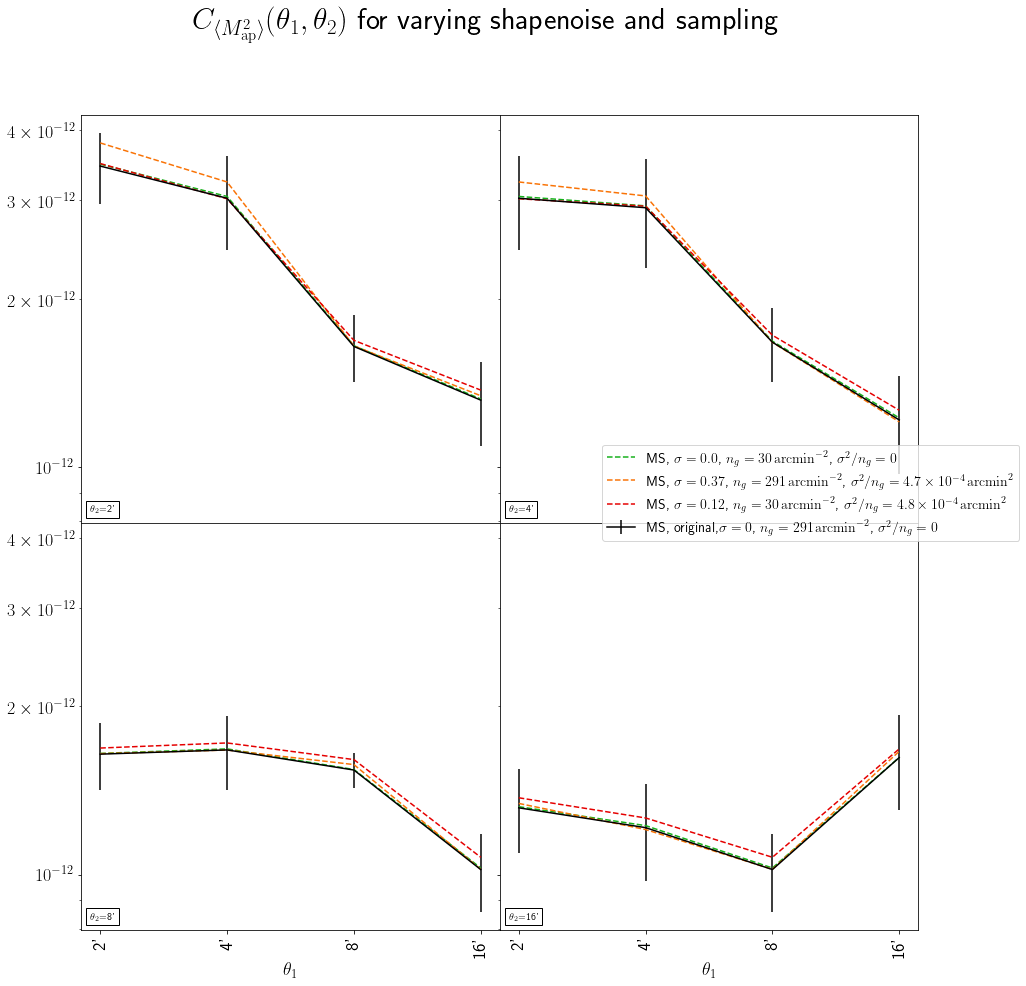

In [58]:
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(15,15))
fig.subplots_adjust(hspace=0, wspace=0)

fig.suptitle(r"$C_{\langle M_\mathrm{ap}^2\rangle}(\theta_1, \theta_2)$ for varying shapenoise and sampling", size=30)

for i,ax in enumerate(axs.ravel()):
    ax.set_yscale('log')
    if (i==2 or i==3):
        ax.set_xticks(thetas_ticks)
        ax.set_xlabel(r'$\theta_1$')
        ax.set_xticklabels(thetas_labels, rotation=90)

    at=AnchoredText(r'$\theta_2$='+thetas_labels[i], loc='lower left')
    ax.add_artist(at)
    #ax.plot(Cov_vanilla[i], label=r"MS, $\sigma=0$, $n_g=291\, \mathrm{arcmin}^{-2}$, $\sigma^2/n_g=0$", color='k')
    ax.errorbar(np.arange(4), Cov_vanilla[i], yerr=Cov_vanilla_std[i]/2, label=r"MS, original,$\sigma=0$, $n_g=291\, \mathrm{arcmin}^{-2}$, $\sigma^2/n_g=0$", color='k')

    ax.plot(Cov_downsampled[i], label=r"MS, $\sigma=0.0$, $n_g=30\, \mathrm{arcmin}^{-2}$, $\sigma^2/n_g=0$", color='xkcd:green', ls='--')
    ax.plot(Cov_shapenoise[i], label=r"MS, $\sigma=0.37$, $n_g=291\, \mathrm{arcmin}^{-2}$, $\sigma^2/n_g=4.7\times10^{-4}\, \mathrm{arcmin}^2$", color='xkcd:orange', ls='--')
    ax.plot(Cov_downsampled_shapenoise2[i], label=r"MS, $\sigma=0.12$, $n_g=30\, \mathrm{arcmin}^{-2}$, $\sigma^2/n_g=4.8\times10^{-4}\, \mathrm{arcmin}^2$", color='xkcd:red', ls='--')
    
   # ax.plot(Cov_downsampled_shapenoise[i], label="MS, downsampled", ls='--', color='xkcd:green')
    #ax.plot(Cov_Gauss_square_shapenoise[i], label="Gaussian, Square", color='xkcd:red', ls='-.')
    #ax.plot(Cov_NonGauss_square_shapenoise[i], label="NonGaussian, Square", color='xkcd:red', ls=':')
    #ax.plot(Cov_Gauss_square_shapenoise[i]+Cov_NonGauss_square_shapenoise[i], label="Sum, Square", color='xkcd:red', ls='-')
    #ax.plot(Cov_Gauss_infinite_shapenoise[i], label="Gaussian, Infinite", color='xkcd:blue', ls='-.')
    #ax.plot(Cov_NonGauss_infinite_shapenoise[i], label="NonGaussian, Infinite", color='xkcd:blue', ls=':')
    #ax.plot(Cov_Gauss_infinite_shapenoise[i]+Cov_NonGauss_infinite_shapenoise[i], label="Sum, Infinite", color='xkcd:blue', ls='-')



handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
